## Datetime processing to select absolute dates (2020/09/12) when given 'Monday'. How to know when a specific day of the month is a Monday?

Earliest date is 2020/09/03, which is a Thursday.

In [59]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
sns.set_style("darkgrid")

In [3]:
boulder_data = pd.read_csv("~/Desktop/coding/boulder_data/boulderdata.csv")

In [3]:
boulder_data.head()

,gym_name,current_time,occupancy,waiting,weather_temp,weather_status
0,regensburg,2020/10/29 17:00,68.0,0.0,7.42,Rain
1,muenchen-west,2020/10/29 17:00,27.0,0.0,9.09,Rain
2,frankfurt,2020/10/29 17:00,59.0,0.0,10.75,Rain
3,dortmund,2020/10/29 17:00,11.0,0.0,9.99,Rain
4,muenchen-ost,2020/10/29 17:00,100.0,14.0,9.09,Rain


In [54]:
def avg_data_day(chosen_day, chosen_gym):
    """returns the all of the data for a specific day of the week, for a specific gym"""

    #returns a number for the chosen day
    chosen_day = chosen_day.lower()
    day_dict = {'monday': 0, 'tuesday': 1, 'wednesday': 2, 'thursday': 3, 'friday': 4, 'saturday': 5,'sunday': 6}
    day_num = day_dict[chosen_day]
    
    # returns all data for a specific day
    list_of_data = []
    for x in boulder_data.current_time.unique():
        date = x
        day = datetime.strptime(date, '%Y/%m/%d %H:%M').weekday()
        if day == day_num:
            list_of_data.append(x)
    ave_day_data = boulder_data[boulder_data['current_time'].isin(list_of_data)]

    # filters df for specific gym
    ave_data = ave_day_data[ave_day_data['gym_name'] == chosen_gym]

    # clean df to have time in a separate column, prep for next step
    ave_data[['date', 'time']] = ave_data['current_time'].str.split(' ', 1, expand=True)
    ave_data.drop(['gym_name', 'current_time', 'date'], inplace=True, axis=1)
    ave_data = ave_data[['time', 'occupancy', 'waiting', 'weather_temp', 'weather_status']]

    # create new df with average data
    final_df = {
        'time': [],
        'occupancy': [],
        'waiting': [],
        'weather_temp': [],
        'weather_status': []
    }

    for t in ave_data.time.unique():
        for_time = ave_data[ave_data['time'] == t]
        final_df['time'].append(t)
        final_df['occupancy'].append(for_time['occupancy'].mean())
        final_df['waiting'].append(for_time['waiting'].mean())
        final_df['weather_temp'].append(for_time['weather_temp'].mean())
        final_df['weather_status'].append(for_time['weather_status'].max())

    final_df = pd.DataFrame(data=final_df)
    final_df.sort_values(by=['time'], inplace=True)

    return final_df

In [55]:
final_test = avg_data_day('Thursday', 'muenchen-ost')
final_test

,time,occupancy,waiting,weather_temp,weather_status
5,07:00,57.714286,4.714286,9.868571,Clouds
8,10:00,43.000000,0.000000,16.320000,Clouds
7,14:00,61.000000,0.000000,20.428000,Clouds
2,15:00,62.428571,0.000000,15.042857,Rain
4,16:00,69.000000,3.571429,17.392857,Clouds
1,16:45,91.000000,0.000000,9.030000,Rain
0,17:00,100.000000,32.000000,14.344000,Rain
11,18:45,100.000000,20.000000,17.890000,Clouds
9,19:00,93.750000,2.000000,16.645000,Clouds
6,19:30,89.250000,0.000000,14.222500,Rain


## Plots

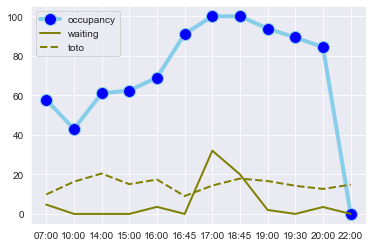

In [60]:
# multiple line plot
plt.plot( 'time', 'occupancy', data=final_test, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'time', 'waiting', data=final_test, marker='', color='olive', linewidth=2)
plt.plot( 'time', 'weather_temp', data=final_test, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()
